<a href="https://colab.research.google.com/github/SergioCSC/sokol/blob/master/huffman/MinHeap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22 57 11 59 8 1 31 71 100 16 

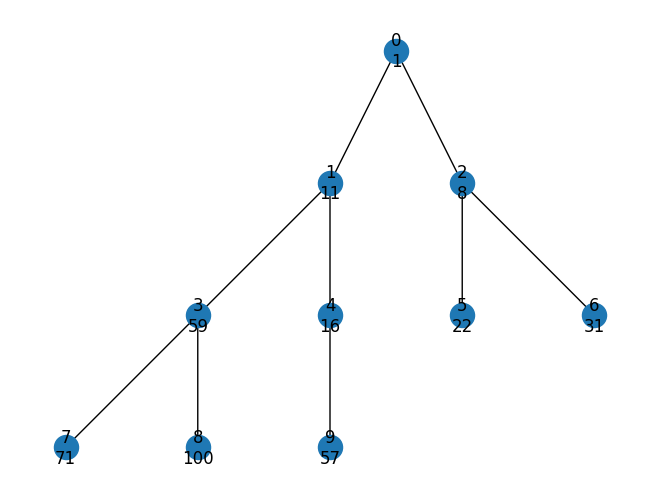


1 8 11 16 22 31 57 59 71 100 

In [3]:
from dataclasses import dataclass


@dataclass
class MinHeap:
    def __init__(self):
        self.a = []

    @staticmethod
    def _get_parent_index(index: int) -> int:
        """Get the index of the parent node"""
        return (index - 1) // 2

    @staticmethod
    def _get_left_child_index(index: int) -> int:
        """Get the index of the left child node"""
        return 2 * index + 1

    @staticmethod
    def _get_right_child_index(index: int) -> int:
        """Get the index of the right child node"""
        return 2 * index + 2

    def size(self) -> int:
        """Return the size of the heap"""
        return len(self.a)

    def push(self, value):
        self.a.append(value)
        self._heapify_up(len(self.a) - 1)

    def _heapify_up(self, index: int):
        """Heapify up the value at the given index"""
        """Move the value at the given index up to maintain the heap property"""
        if index < 0 or index >= len(self.a):
            return  # Invalid index
        if index == 0:  # If it is the root, no need to heapify up
            return
        parent_index = self._get_parent_index(index)
        if self.a[index] < self.a[parent_index]:
            self.a[index], self.a[parent_index] = self.a[parent_index], self.a[index]
            self._heapify_up(parent_index)

    def pop(self):
        """Extract the minimum value from the heap"""
        if len(self.a) == 0:
            return None
        if len(self.a) == 1:
            return self.a.pop()

        min_value = self.a[0]
        self.a[0] = self.a.pop()
        self._heapify_down(0)
        return min_value

    def _heapify_down(self, index: int):
        """Heapify down the value at the given index"""
        if index < 0 or index >= len(self.a):
            return
        left_child_index = self._get_left_child_index(index)
        right_child_index = self._get_right_child_index(index)
        if left_child_index < len(self.a) and right_child_index < len(self.a):
            # Both children exist, find the smaller one
            # Compare the left and right children to find the smaller one
            left_child_value = self.a[left_child_index]
            right_child_value = self.a[right_child_index]
            min_child_index = left_child_index if left_child_value < right_child_value else right_child_index
        elif left_child_index < len(self.a):
            # Only the left child exists
            min_child_index = left_child_index
        elif right_child_index < len(self.a):
            # Only the right child exists
            min_child_index = right_child_index
        else:
            # No children exist
            return
        if self.a[min_child_index] < self.a[index]:
            self.a[index], self.a[min_child_index] = self.a[min_child_index], self.a[index]
            self._heapify_down(min_child_index)


    def node2str(self, index: int) -> str:
        return f'{index}\n{self.a[index]}'

    def get_adjacency_dict(self, node_index) -> dict[str, tuple[str]]:
        """Recursively build an adjacency dictionary for visualization."""
        if node_index >= len(self.a):
            return {}

        left_child_index = MinHeap._get_left_child_index(node_index)
        if left_child_index >= len(self.a):
            return {}

        right_child_index = MinHeap._get_right_child_index(node_index)

        if right_child_index >= len(self.a):
            # If only the left child exists, include it in the adjacency dictionary
            my = {self.node2str(node_index): ((self.node2str(left_child_index),))}
        else:
            # If both children exist, include both in the adjacency dictionary
            my = {self.node2str(node_index): (self.node2str(left_child_index), self.node2str(right_child_index))}

        # Recursively build the adjacency dictionary for the left and right children
        return my | self.get_adjacency_dict(left_child_index) | self.get_adjacency_dict(right_child_index)


import matplotlib.pyplot as plt
import networkx as nx

def draw_tree(adjacency_dict: dict[str, tuple[str]]):
    """Draw the Huffman tree using networkx and matplotlib."""
    H = nx.Graph(adjacency_dict)
    pos=nx.nx_pydot.graphviz_layout(H, prog='dot')
    # pos = nx.bfs_layout(H, 0, align='horizontal')
    nx.draw(H, pos=pos, arrows=True, with_labels=True)
    plt.show()



import random
def generate_random_array(size: int, min_value: int = 1, max_value: int = 100) -> list:
    """Generate a random array of integers"""
    return [random.randint(min_value, max_value) for _ in range(size)]

arr = generate_random_array(10)
min_heap = MinHeap()
for value in arr:
    print(value, end=' ')
    min_heap.push(value)

adjacency_dict = min_heap.get_adjacency_dict(0)
# print(f"\nAdjacency dictionary: {adjacency_dict}")
draw_tree(adjacency_dict)

print()
while value := min_heap.pop():
    print(value, end=' ')